<a href="https://colab.research.google.com/github/joaovitordeon/esig_kaggle_challenges/blob/master/taxi_fare_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise exploratória dos dados


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
! ls "/content/drive/My Drive/e-sig/taxi_fare"

sample_submission.csv  taxi_fare_kaggle.ipynb  taxi_train.csv  test.csv


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df_train = pd.read_csv("/content/drive/My Drive/e-sig/taxi_fare/taxi_train.csv")

In [0]:
df_test = pd.read_csv("/content/drive/My Drive/e-sig/taxi_fare/test.csv")

In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 542.2+ KB


In [0]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
key                  1048575 non-null object
fare_amount          1048575 non-null float64
pickup_datetime      1048575 non-null object
pickup_longitude     1048575 non-null float64
pickup_latitude      1048575 non-null float64
dropoff_longitude    1048565 non-null float64
dropoff_latitude     1048565 non-null float64
passenger_count      1048575 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 64.0+ MB


**dropoff_longitude e dropoff_latitude com valores nulos**

**mudar o tipo de key e pickup_datetime para datetime**

In [0]:
df_train.dropna(inplace=True, axis='index')

In [0]:
#criação de features de ano, mes, dia da semana e hora
def add_date_features(df):
  df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
  
  df['pickup_datetime_year'] = df['pickup_datetime'].dt.year
  df['pickup_datetime_month'] = df['pickup_datetime'].dt.month
  df['pickup_datetime_day_week'] = df['pickup_datetime'].dt.weekday
  df['pickup_datetime_day'] = df['pickup_datetime'].dt.day
  df['pickup_datetime_day_hour'] = df['pickup_datetime'].dt.hour

add_date_features(df_train)  

In [0]:
#função de distancia dado longitude e latitude

def haversine_distance(df):    
    
  R = 6371  #radius of earth in kilometers
  #R = 3959 #radius of earth in miles
  phi1 = np.radians(df['pickup_latitude'])
  phi2 = np.radians(df['dropoff_latitude'])

  delta_phi = np.radians(df['dropoff_latitude']-df['pickup_latitude'])
  delta_lambda = np.radians(df['dropoff_longitude']-df['pickup_longitude'])

  #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
  a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2

  #c = 2 * atan2( √a, √(1−a) )
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

  #d = R*c
  d = (R * c) #in km
  df['distance'] = d
  

In [0]:
haversine_distance(df_train)

In [0]:
len(df_train[((df_train.distance<=0) | (df_train.distance>200))])

38871

**apagar esses dados onde a distancia é menor que zero km**

In [0]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day_week,pickup_datetime_day,pickup_datetime_day_hour,distance
count,1.048565e+06,1.048565e+06,1.048565e+06,1.048565e+06,1.048565e+06,1.048565e+06,1.048565e+06,1.048565e+06,1.048565e+06,1.048565e+06,1.048565e+06,1.048565e+06
mean,1.134536e+01,-2.117889e+02,1.114547e+02,-2.039583e+02,1.088918e+02,1.684918e+00,2.011741e+03,6.267614e+00,3.039552e+00,1.569893e+01,1.350857e+01,5.962895e+01
std,9.819785e+00,3.205070e+03,1.707329e+03,3.115245e+03,1.679071e+03,1.323151e+00,1.860614e+00,3.436193e+00,1.949903e+00,8.681039e+00,6.513892e+00,6.558114e+02
min,-4.490000e+01,-7.411500e+04,-7.399500e+04,-7.420200e+04,-7.400100e+04,0.000000e+00,2.009000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399213e+01,4.073501e+01,-7.399143e+01,4.073410e+01,1.000000e+00,2.010000e+03,3.000000e+00,1.000000e+00,8.000000e+00,9.000000e+00,1.217331e+00
50%,8.500000e+00,-7.398184e+01,4.075273e+01,-7.398018e+01,4.075324e+01,1.000000e+00,2.012000e+03,6.000000e+00,3.000000e+00,1.600000e+01,1.400000e+01,2.130800e+00
75%,1.250000e+01,-7.396716e+01,4.076725e+01,-7.396372e+01,4.076822e+01,2.000000e+00,2.013000e+03,9.000000e+00,5.000000e+00,2.300000e+01,1.900000e+01,3.939849e+00
max,5.000000e+02,2.522271e+03,4.084900e+04,4.078500e+04,4.090200e+04,2.080000e+02,2.015000e+03,1.200000e+01,6.000000e+00,3.100000e+01,2.300000e+01,1.988110e+04


**Temos valores menores que zero em fare_amount, o que indica possível input error **

**Em passenger_count temos dois outliers (2.08e2 = 208) e 0 passageiros.**

**valores muito altos em medidas de latitude e longitude**

**valores muito baixos em latidude e longitude**

**valores extremos em distance**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


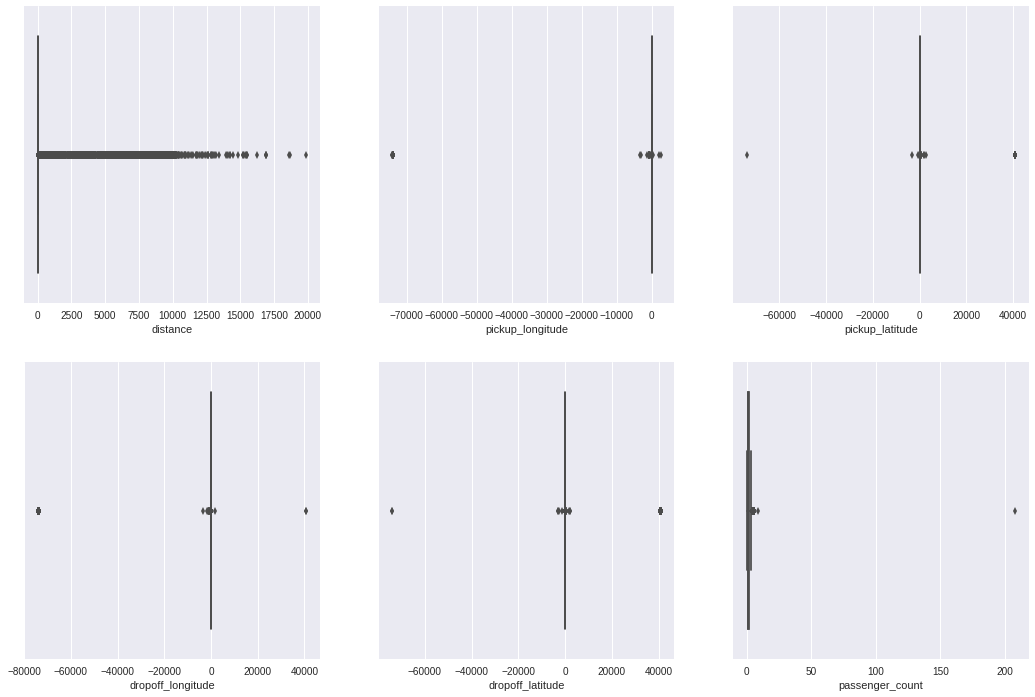

In [0]:
#vamos buscar esses outliers visualmente
fig, ax = plt.subplots(2,3, figsize=(18,12))
b1 = sns.boxplot(df_train['distance'], ax=ax[0][0]  )
b2 = sns.boxplot(df_train['pickup_longitude'], ax=ax[0][1])
b3 = sns.boxplot(df_train['pickup_latitude'], ax=ax[0][2])
b4 = sns.boxplot(df_train['dropoff_longitude'], ax=ax[1][0])
b5 = sns.boxplot(df_train['dropoff_latitude'], ax=ax[1][1])
b6 = sns.boxplot(df_train['passenger_count'], ax=ax[1][2])
    

**limites da latitude: [-90,90] ;  limites da longitude:[-180,180]**

**remover os outliers de latitude e longitude que extrapolem esses limites acima**

**remover as passagens acima de 300 dolares, pois sao possuveis outlires de input error**

**remover o dado que possui passenger_count = 208**

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


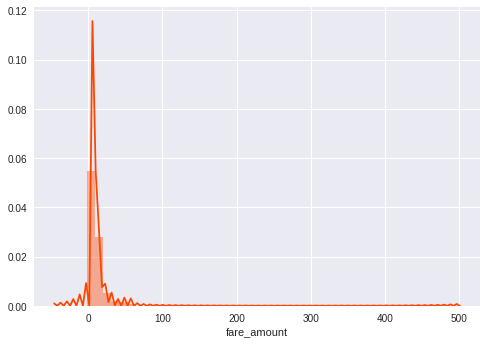

In [0]:
#visualização do target(fare_amount)
h = sns.distplot(df_train['fare_amount'], color='orangered')


**Aqui vemos graficamente valores menores que zero**

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


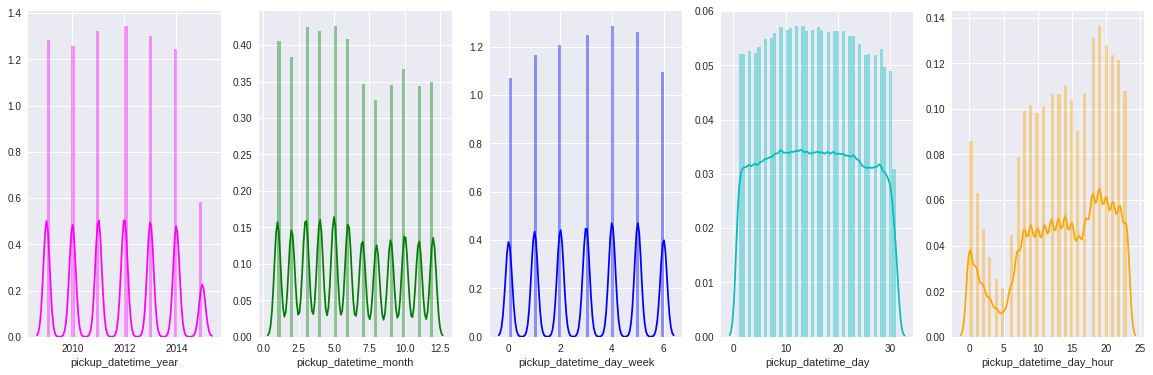

In [0]:
#analisando graficamente as novas features de ano, mes, dia da semana e hora
fig, ax = plt.subplots(1,5, figsize=(20,6))
d1= sns.distplot(df_train['pickup_datetime_year'], ax=ax[0], color='magenta')
d2 = sns.distplot(df_train['pickup_datetime_month'], ax=ax[1], color='green')
d3 = sns.distplot(df_train['pickup_datetime_day_week'], ax=ax[2], color='blue')
d4 = sns.distplot(df_train['pickup_datetime_day'], ax=ax[3], color='c')
d5 = sns.distplot(df_train['pickup_datetime_day_hour'], ax=ax[4], color='orange')


**no ano de 2015 parece que temos uma queda de usuários em relação aos anos anteriores**

**5 hrs da manhã parece ser a hora com menos corridas**

In [0]:
df = df_train.copy()

In [0]:
len(df)

1048565

In [0]:
#vamos tratar os erros acima descritos

# deletar valores menores ou iguais a zero em fare_amount
df = df[df.fare_amount > 0]

In [0]:
len(df)

1048496

In [0]:
#deletar dados de passenger_count que sejam menores ou iguais a zero e o outlier 208
df=df[~(df.passenger_count <= 0)]
df=df[df.passenger_count != 208]

In [0]:
len(df)

1044781

In [0]:
#deletar os outliers de distance...vamos considerar corridas maior que 1km e menor que 200 km
df = df[df.distance>0]
df = df[df.distance<200]

In [0]:
len(df)

1006536

In [0]:
#deletar os valores de latitude e longitude que passem dos limites
df= df.drop(((df[df['pickup_latitude']<-90])|(df[df['pickup_latitude']>90])).index, axis=0)
df = df.drop(((df[df['pickup_longitude']<-180])|(df[df['pickup_longitude']>180])).index, axis=0)
df = df.drop(((df[df['dropoff_longitude']<-180])|(df[df['dropoff_longitude']>180])).index, axis=0)
df = df.drop(((df[df['dropoff_latitude']<-180])|(df[df['dropoff_latitude']>180])).index, axis=0)

In [0]:
len(df)

1006410

In [0]:
#deletar dados onde fare_amount é maior que 500 dolares
df=df[df.fare_amount<=500]

In [0]:
len(df)

1006410

In [0]:
#excluir algumas colunas para treinar o modelo
df.drop(columns=['key','pickup_datetime'], inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006410 entries, 0 to 1048574
Data columns (total 12 columns):
fare_amount                 1006410 non-null float64
pickup_longitude            1006410 non-null float64
pickup_latitude             1006410 non-null float64
dropoff_longitude           1006410 non-null float64
dropoff_latitude            1006410 non-null float64
passenger_count             1006410 non-null int64
pickup_datetime_year        1006410 non-null int64
pickup_datetime_month       1006410 non-null int64
pickup_datetime_day_week    1006410 non-null int64
pickup_datetime_day         1006410 non-null int64
pickup_datetime_day_hour    1006410 non-null int64
distance                    1006410 non-null float64
dtypes: float64(6), int64(6)
memory usage: 99.8 MB


# Modelagem e predição

In [0]:
#preparando o dataset de tests com as mesmas features do de treino
add_date_features(df_test)
haversine_distance(df_test)

In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 13 columns):
key                         9914 non-null object
pickup_datetime             9914 non-null datetime64[ns]
pickup_longitude            9914 non-null float64
pickup_latitude             9914 non-null float64
dropoff_longitude           9914 non-null float64
dropoff_latitude            9914 non-null float64
passenger_count             9914 non-null int64
pickup_datetime_year        9914 non-null int64
pickup_datetime_month       9914 non-null int64
pickup_datetime_day_week    9914 non-null int64
pickup_datetime_day         9914 non-null int64
pickup_datetime_day_hour    9914 non-null int64
distance                    9914 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 1007.0+ KB


In [0]:
#copia de df_test
test_aux = df_test.copy()

In [0]:

test_aux.drop(columns=['key','pickup_datetime'], inplace=True )

In [0]:
X = df.drop(columns=['fare_amount'])
y = df.fare_amount

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf = RandomForestRegressor(n_estimators=50, min_samples_split = 10)
rf.fit(X, y)
pred = rf.predict(test_aux)

In [0]:
submission = pd.read_csv("/content/drive/My Drive/e-sig/taxi_fare/sample_submission.csv")
submission['fare_amount'] = pred
submission.to_csv('submission_1.csv', index=False)
submission.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.688878
1,2015-01-27 13:08:24.0000003,10.418181
2,2011-10-08 11:53:44.0000002,4.332147
3,2012-12-01 21:12:12.0000002,8.672769
4,2012-12-01 21:12:12.0000003,16.381850
5,2012-12-01 21:12:12.0000005,11.436706
6,2011-10-06 12:10:20.0000001,5.352192
7,2011-10-06 12:10:20.0000003,49.329758
8,2011-10-06 12:10:20.0000002,14.849498
9,2014-02-18 15:22:20.0000002,6.102248


In [0]:
from google.colab import files
files.download('submission_1.csv')